<a href="https://colab.research.google.com/github/sureshmecad/Google-Colab/blob/master/Project_1_ADROIT_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Project 1**

#### **ADROIT: Android malware detection using meta-information**

##### **Company :** The Machine Learning Company

##### **Role :** Machine Learning Intern

##### **Author :** Anuganti Suresh

#### **Problem Statement**

- The task is to **classify** whether an android app is **benign or malware.**

#### **Dataset Information:**

- **Number of Rows :** 23533

- **Number of Columns :** 184

|Feature               |Description                               |
|----------------------|------------------------------------------|
|App                   |Name of the App                           |
|Package               |Name of the Package                       |
|Category              |The category in which app belongs         |
|Description           |The description of the app                |
|Rating                |Rating of the app                         |
|Number of Ratings     |Number of times the app is rated          |
|Price                 |Price of the App                          |
|Related Apps          |Apps having similar characteristics       |
|Dangerous Permission  |Number of potentially dangerous permissions|
|Safe Permissions      |Number of safe permissions                 |
|Class                 |Category of the app {Benign (0) or malware (1)}|

### Table of Contents

* [1) Import Libraries](#1)

* [2) Import Data And Preprocessing](#2)

* [3) Exploratory Data Analysis](#3)

 * [3.1) Visualizations](#3.1)

   * [3.1.1 Univariate Analysis](#3.1.1)
   * [3.1.2 Bivariate Analysis](#3.1.2)
   * [3.1.3 Multivariate Analysis](#3.1.3)

 * [3.2) Relation between Features](#3.2)

   * [3.2.1 The correlation between the continuos variables](#3.2.1)
   * [3.2.2) The correlation between this continuos features and the target](#3.2.1)

 * [3.3) Skewness and Kurtosis](#3.3)

 * [4) Feature Engineering](#4)

   * [4.1) Missing Values](#4.1)
   * [4.2) Outliers](#4.2)
   * [4.3) Label Encoding](#4.3)
   * [4.4) Scaling](#4.4)

* [5) Modelling](#5)

* [6) Model Evaluation](#6)

* [7) Hyperparameter Tuning](#7)

* [8) Prediction](#8)



#### **1) Import Libraries**

In [1]:
# Read Data
import numpy as np                     # Linear Algebra (calculate the mean and standard deviation)
import pandas as pd                    # manipulate data, data processing, load csv file I/O (e.g. pd.read_csv)

# Visualization
import seaborn as sns                  # Visualization using seaborn
import matplotlib.pyplot as plt        # Visualization using matplotlib
%matplotlib inline

# style
plt.style.use("fivethirtyeight")       # Set Graphs Background style using matplotlib
sns.set_style("darkgrid")              # Set Graphs Background style using seaborn

import warnings                        # Ignore Warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier, plot_importance

#### **2) Import Data And Preprocessing**


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
Android = pd.read_csv("/content/drive/MyDrive/TMLC/Android.zip")

In [5]:
display(Android.head(3))
display(Android.tail(3))

App  ... Class
0  Canada Post Corporation  ...     0
1                Word Farm  ...     0
2     Fortunes of War FREE  ...     0

[3 rows x 184 columns]

App  ... Class
29996   Super Task Killer FREE  ...     1
29997  Ambassador Hotel Taipei  ...     1
29998          Brain Ball Game  ...     1

[3 rows x 184 columns]

In [6]:
Android.shape

(29999, 184)

In [8]:
train_original = Android.copy()

In [51]:
Android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Columns: 184 entries, App to Class
dtypes: float64(3), int64(176), object(5)
memory usage: 42.1+ MB


In [52]:
Android.describe()

Rating  ...         Class
count  29999.000000  ...  29999.000000
mean       3.537215  ...      0.666689
std        1.424685  ...      0.471405
min        0.000000  ...      0.000000
25%        3.300000  ...      0.000000
50%        4.000000  ...      1.000000
75%        4.400000  ...      1.000000
max        5.000000  ...      1.000000

[8 rows x 179 columns]

#### **3) Exploratory Data Analysis**

#### **3.1) Visualizations**

##### **3.1.1) Univariate Analysis**

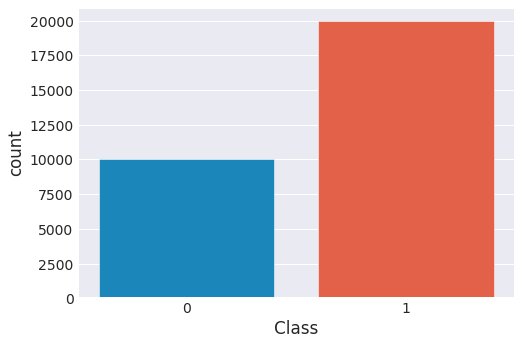

In [53]:
plt.figure(figsize=(7,5))
sns.countplot(data=Android, x='Class')

##### **3.1.2) Bivariate Analysis --> plotting two variables)**

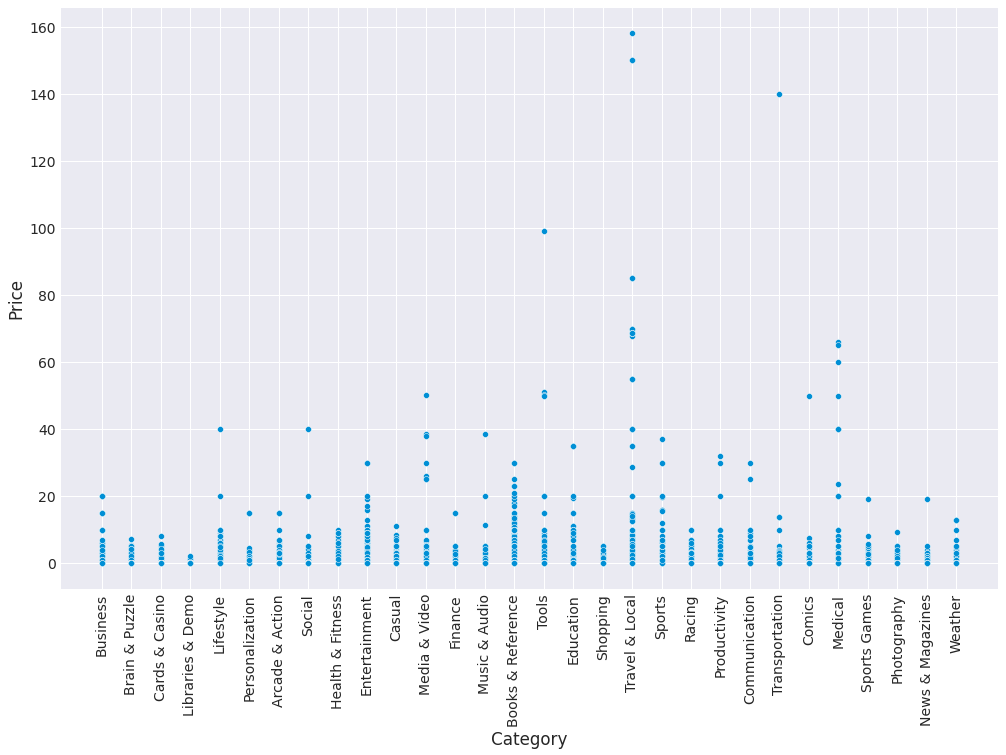

In [54]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Category', y='Price', data=Android)
plt.xticks(rotation=90)
plt.show()

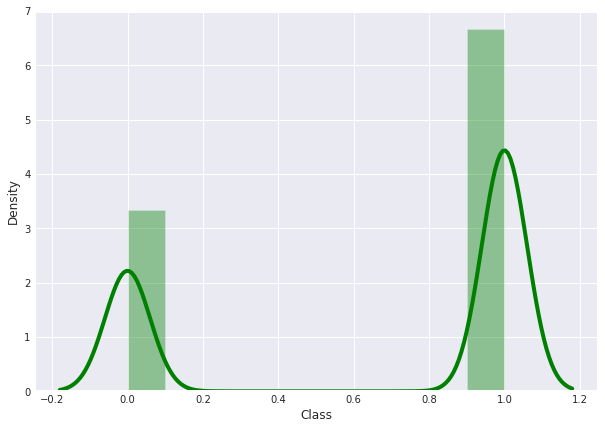

In [ ]:
plt.figure(figsize=(9,7))
sns.distplot(Android['Class'], color='g', bins=10, hist_kws={'alpha':0.4});

##### **Numerical Features**

In [ ]:
df_num = Android.select_dtypes(include=['int64', 'float64'])
df_num.head()

Rating  ...  Class
0     3.1  ...      0
1     4.3  ...      0
2     4.1  ...      0
3     3.6  ...      0
4     0.0  ...      1

[5 rows x 179 columns]

In [ ]:
A = df_num.iloc[:, :45]

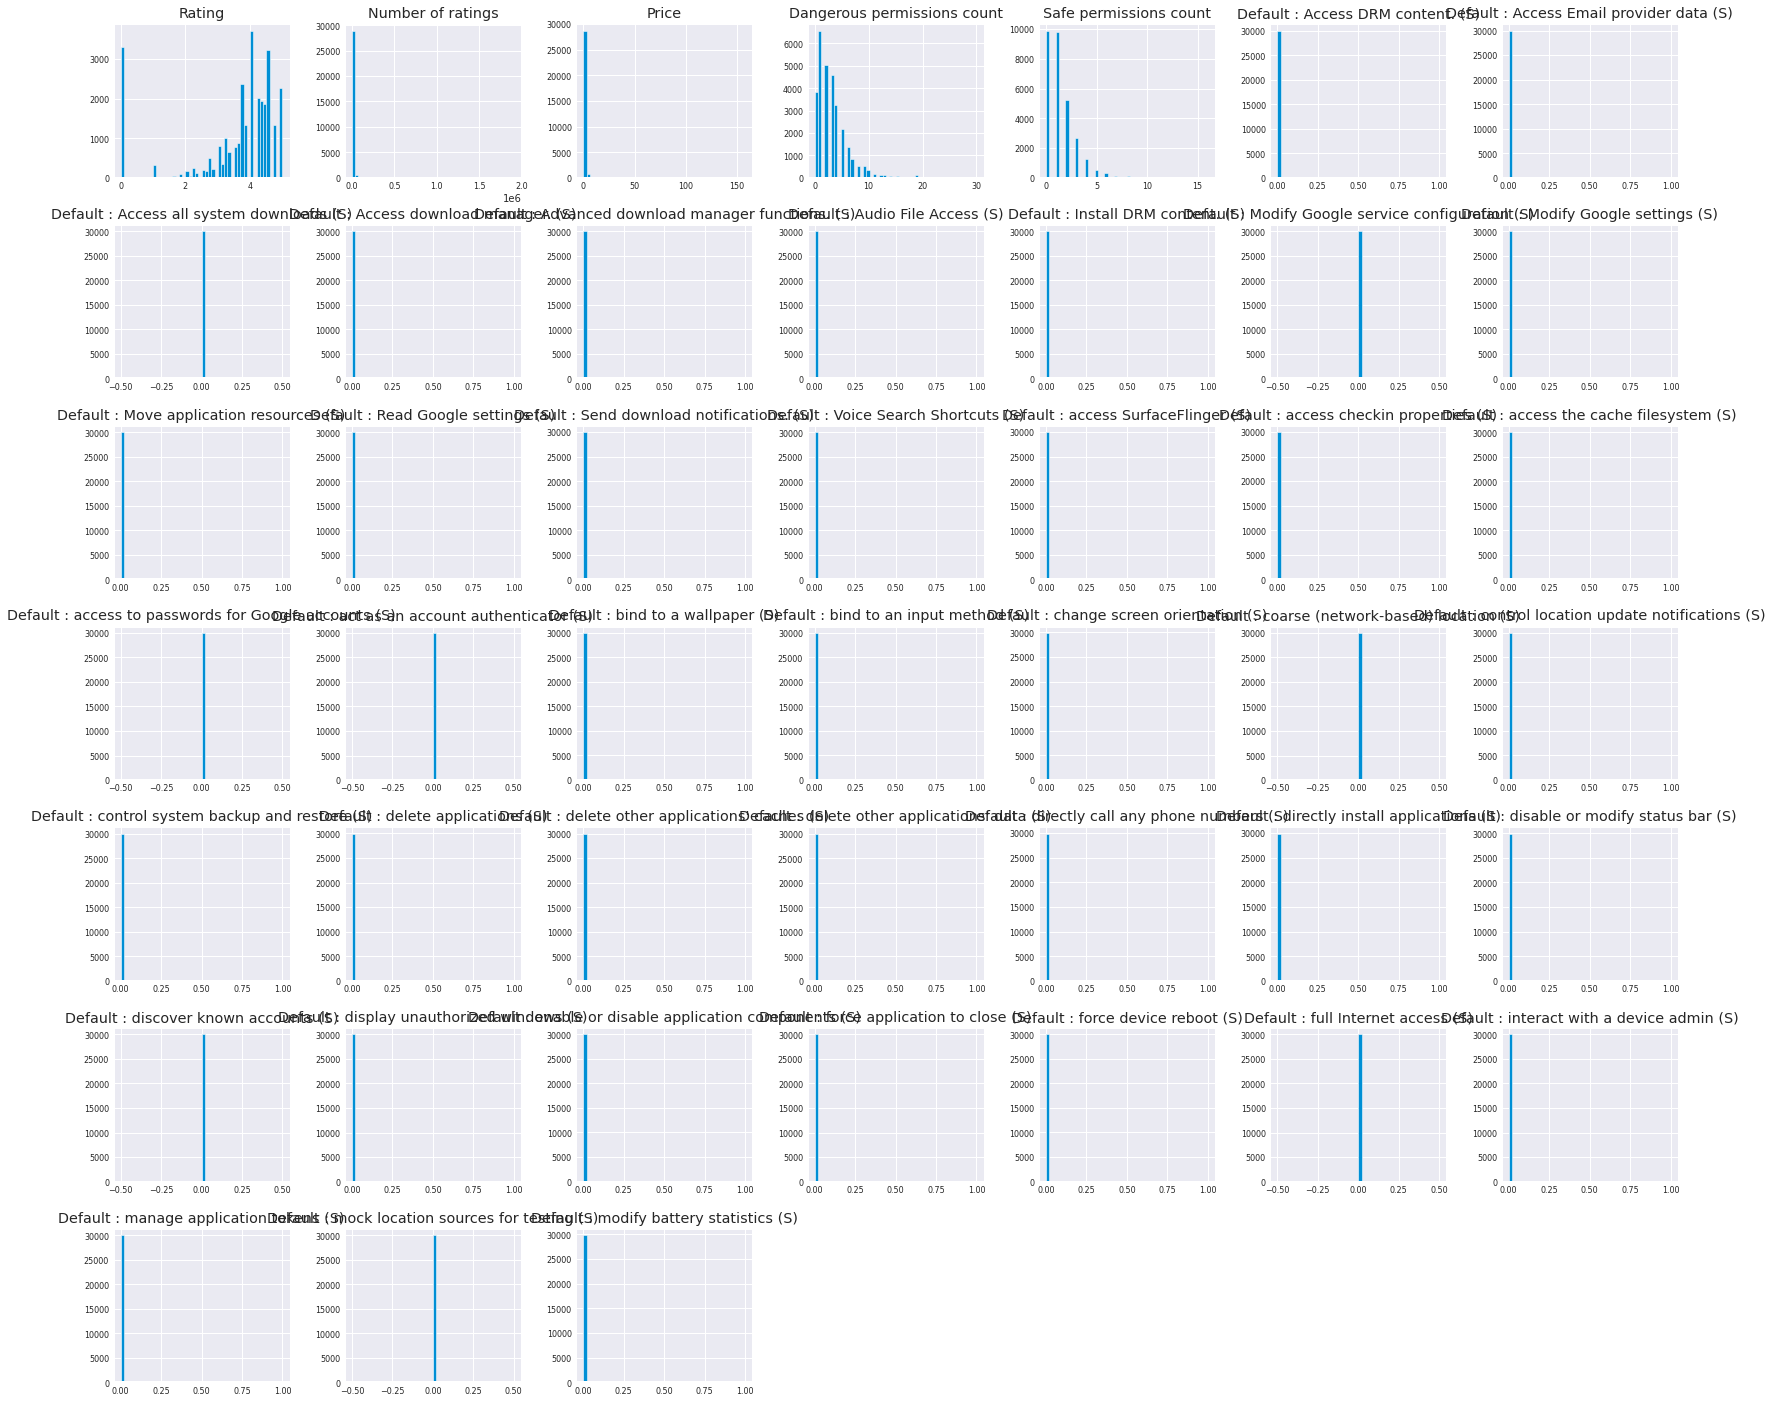

In [ ]:
A.hist(figsize=(25,25), bins=50, xlabelsize=8, ylabelsize=8);

#### **3.2) Relation between Features**

**3.2.1) The correlation between the continuos variables**

- a) Pearson Correlation

- b) Spearman Correlation

- c) kendall

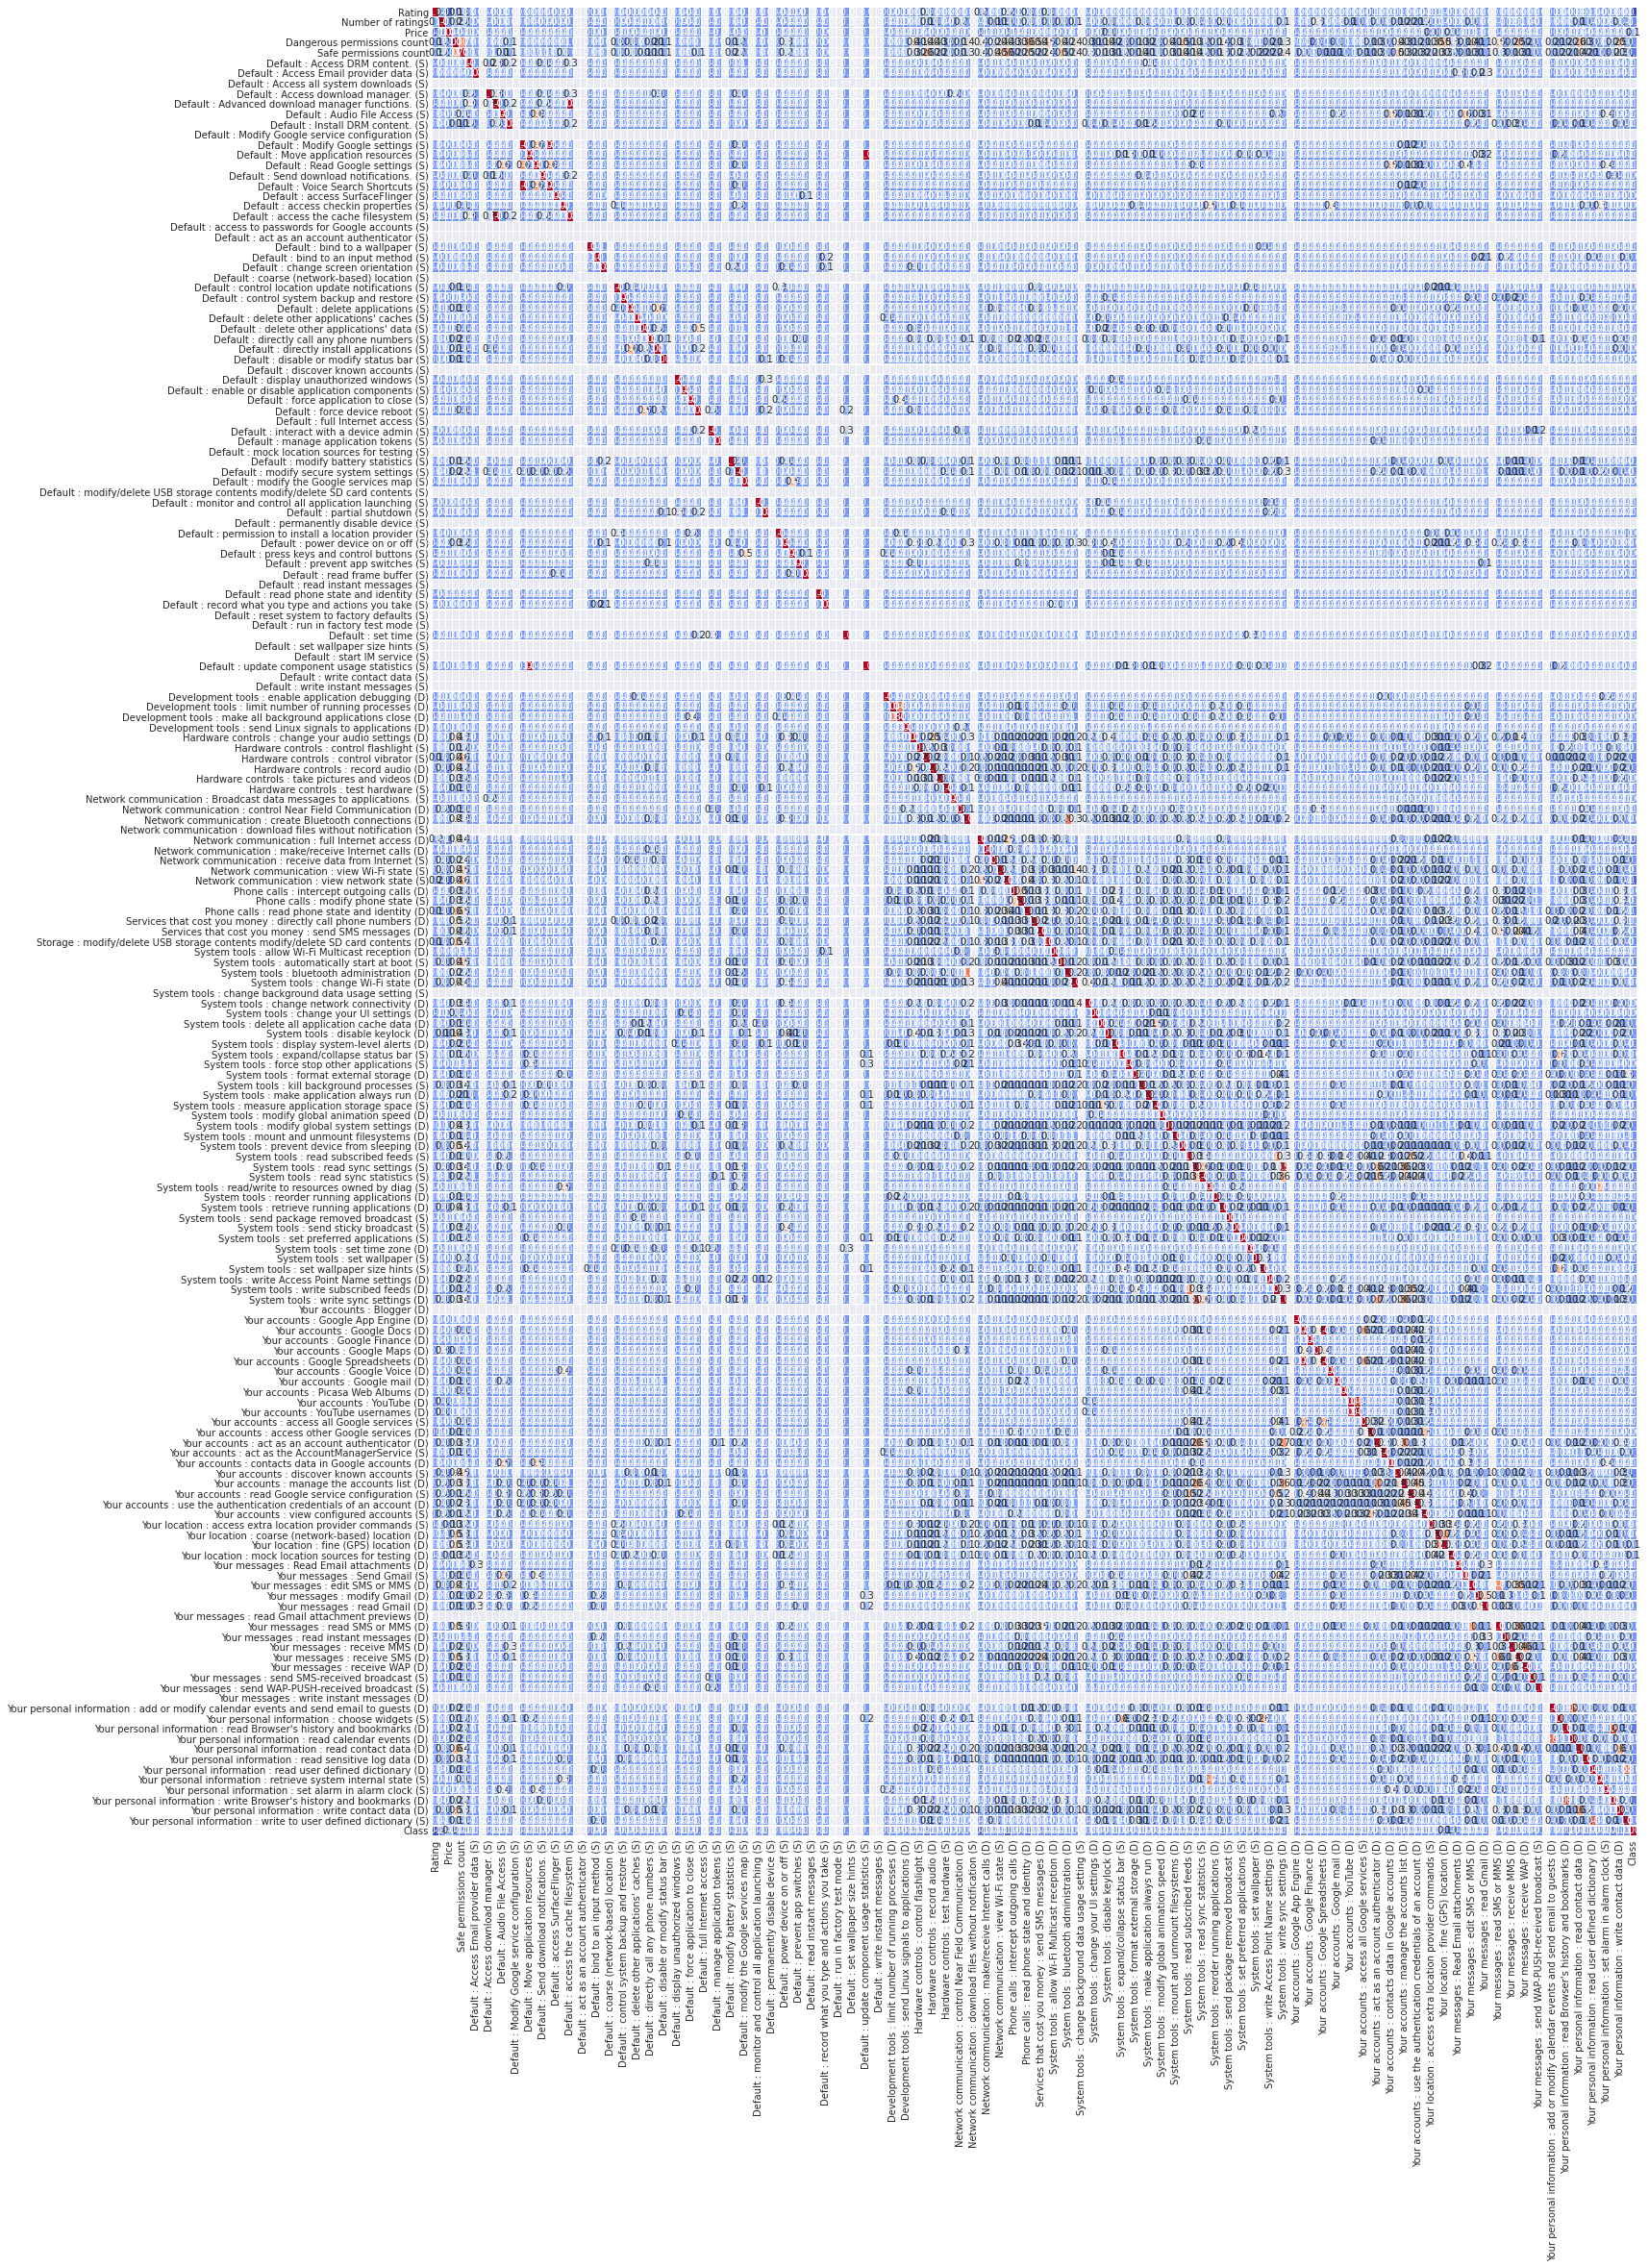

In [ ]:
# Pearson Correlation
plt.figure(figsize=(20,35))
sns.heatmap(Android.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

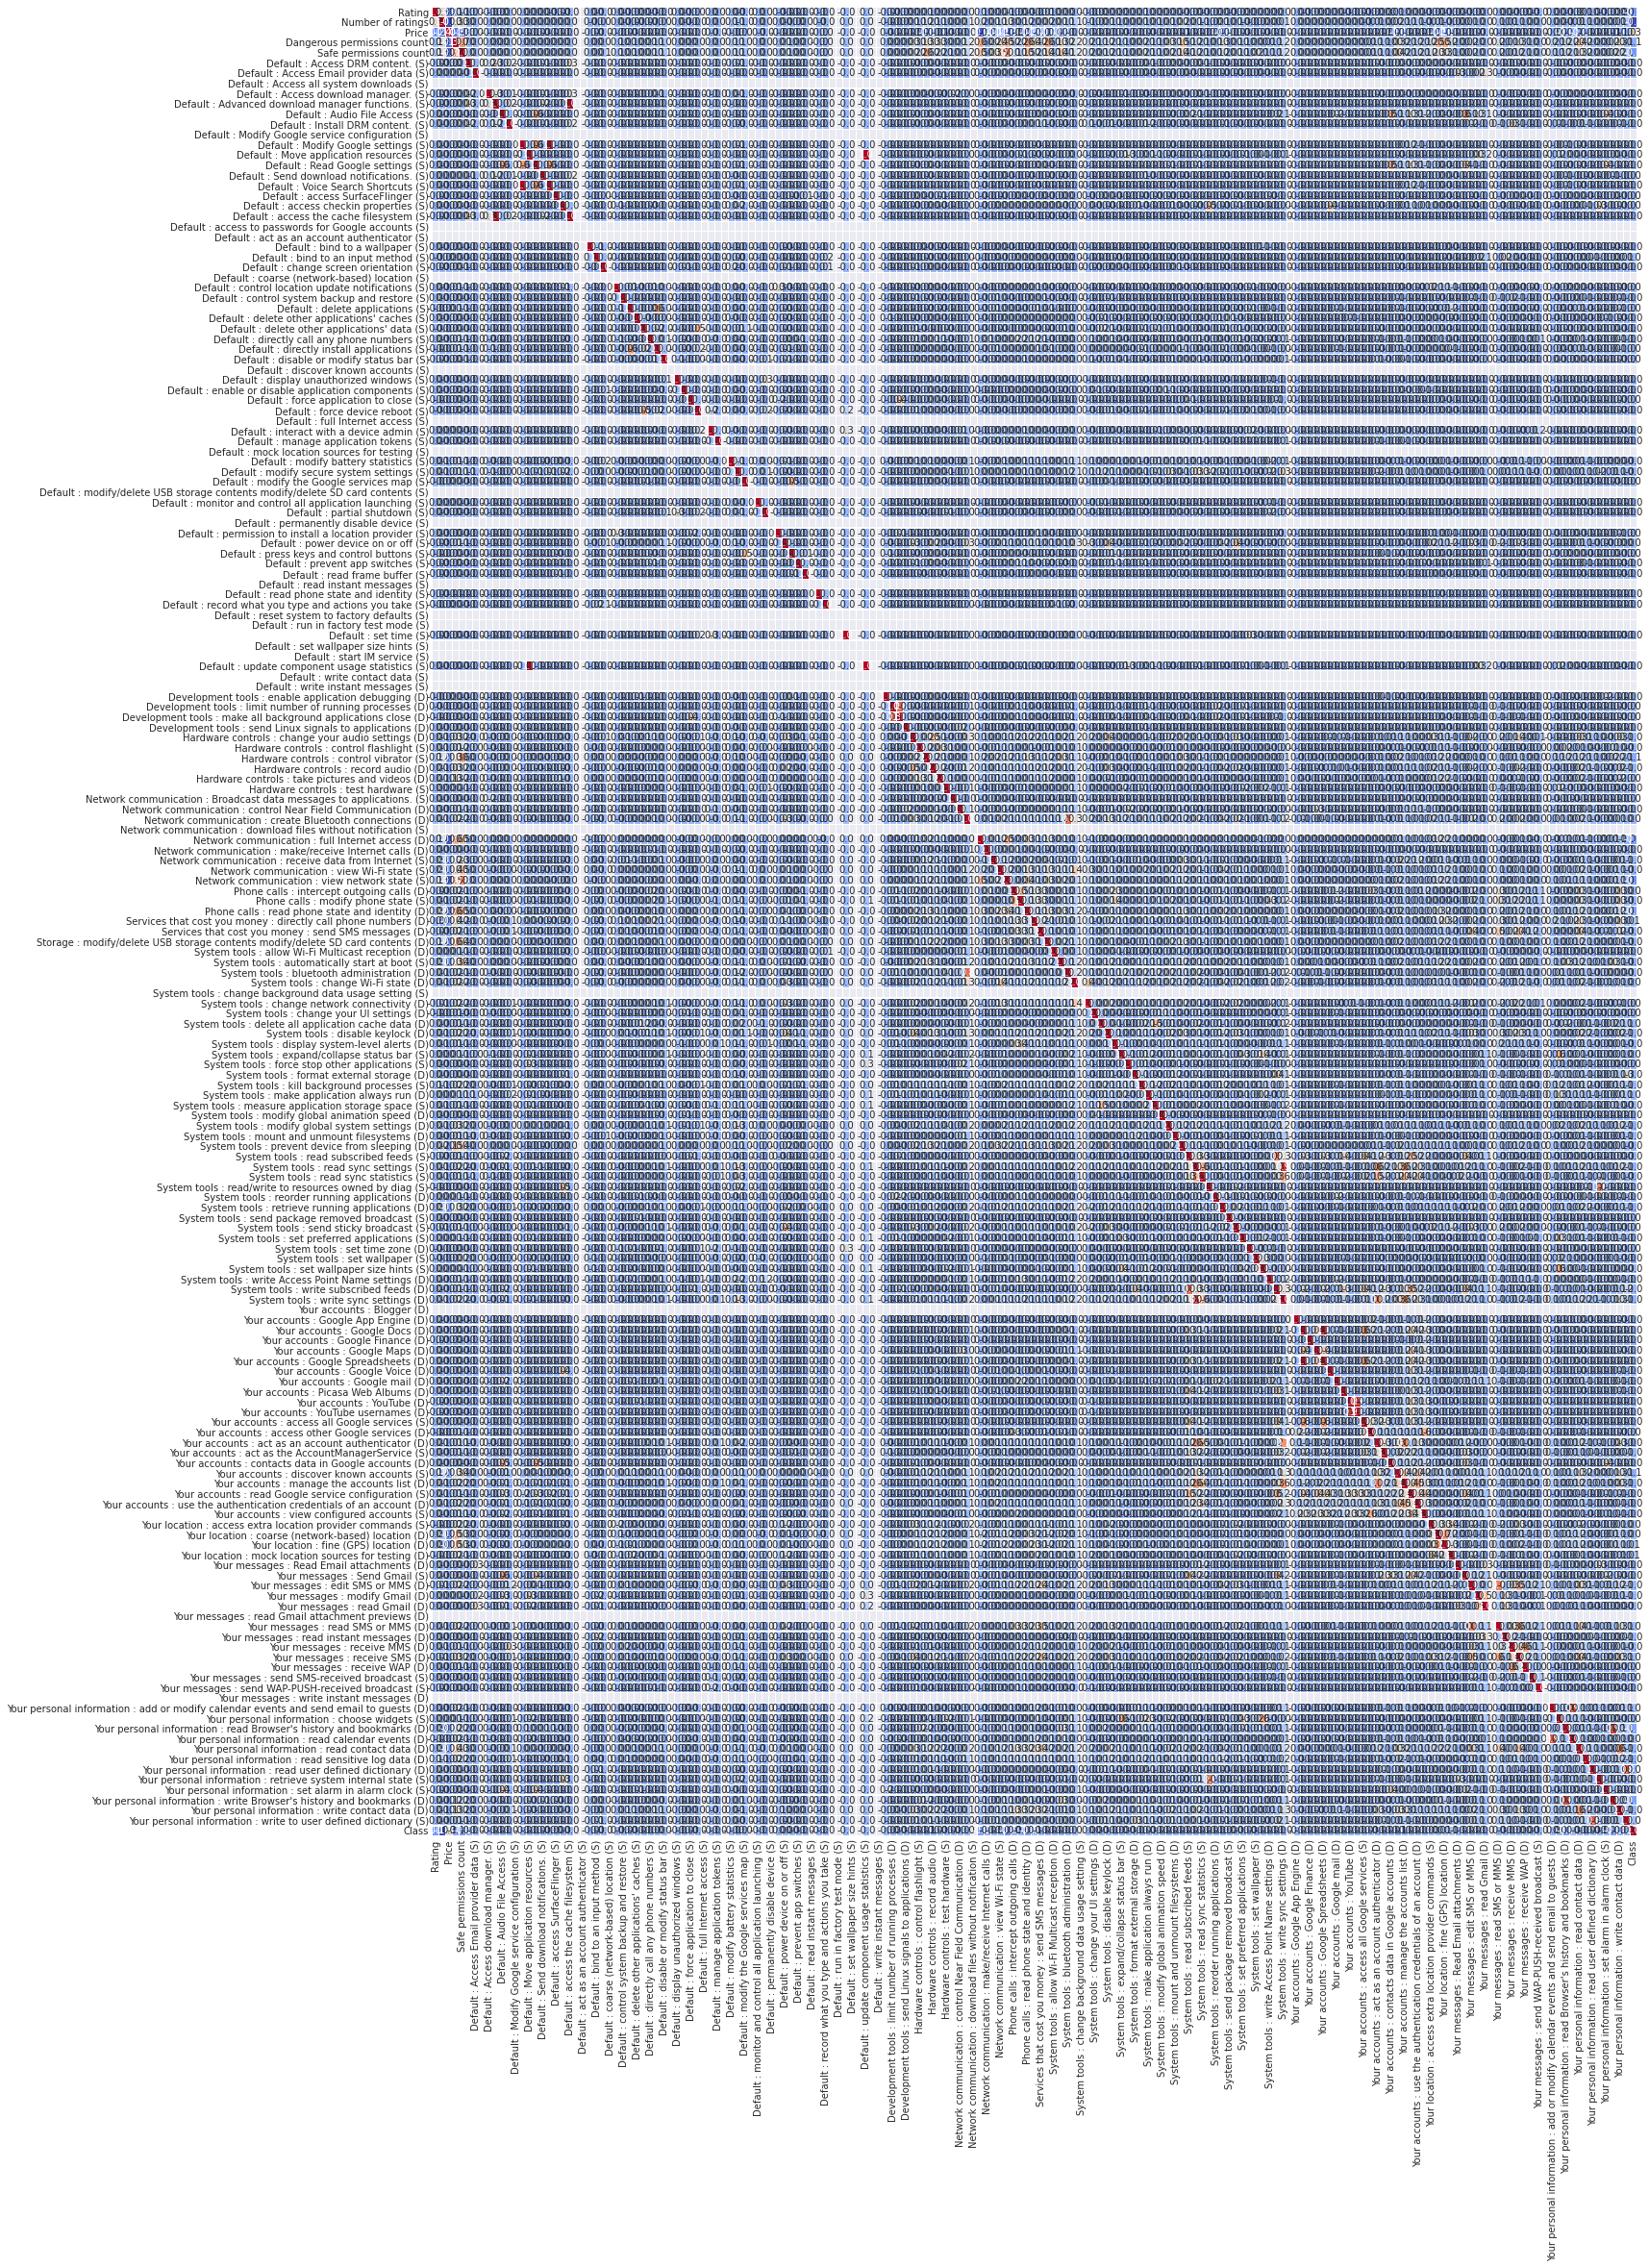

In [ ]:
# Spearman Correlation
plt.figure(figsize=(20,35))
sns.heatmap(Android.corr(method='spearman'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

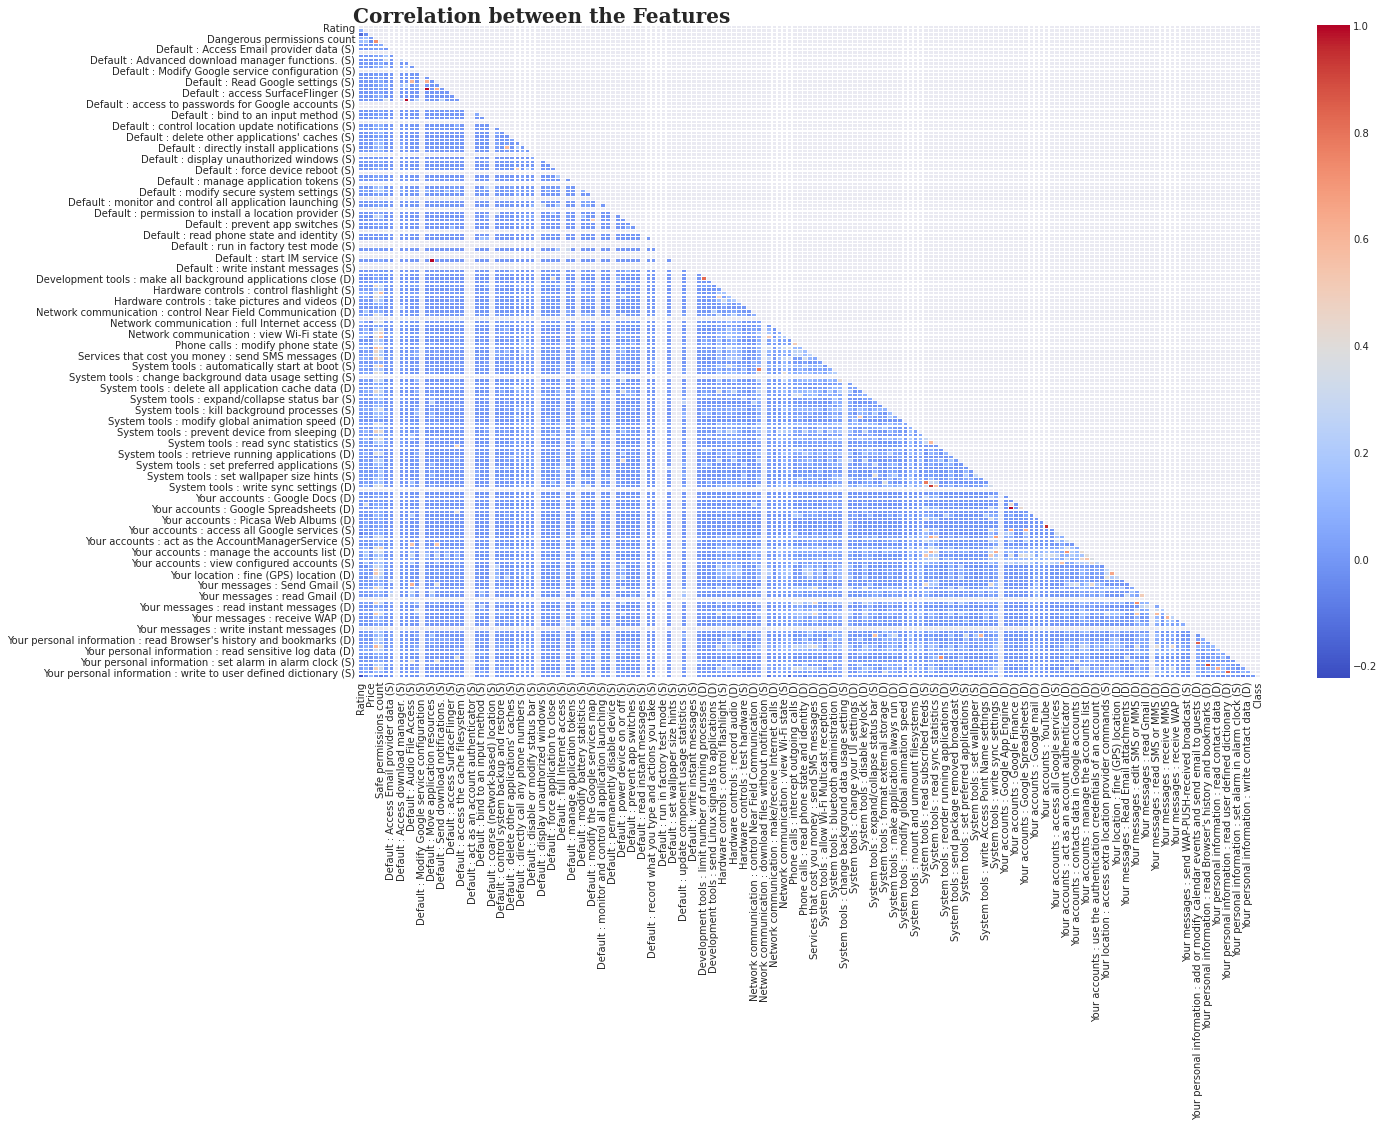

In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))
corr = Android.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax.text(-1.1, -0.7, 'Correlation between the Features', fontsize=20, fontweight='bold', fontfamily='serif')
sns.heatmap(corr, mask=mask, annot=False, fmt='.2f', linewidth=0.2, cbar=True, cmap='coolwarm');

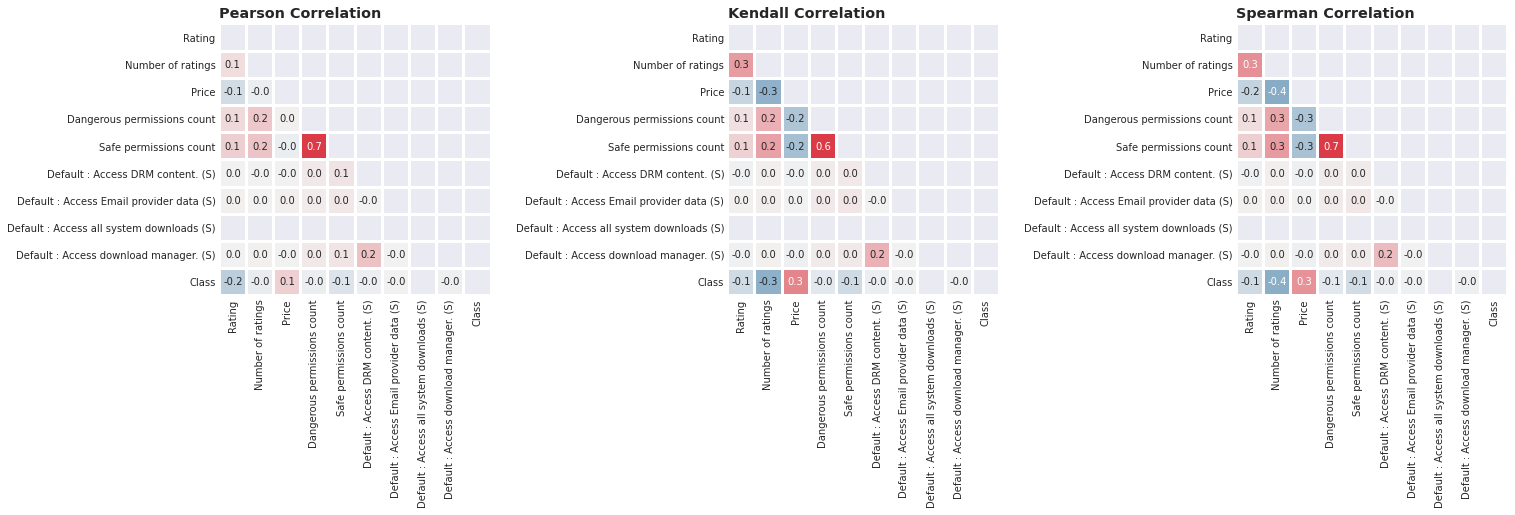

In [ ]:
# kendall
fig, ax = plt.subplots(1, 3, figsize=(23 , 5))

feature_lst = ['Rating', 'Number of ratings', 'Price','Dangerous permissions count','Safe permissions count', 'Default : Access DRM content. (S)',
               'Default : Access Email provider data (S)', 'Default : Access all system downloads (S)', 'Default : Access download manager. (S)', 'Class']

corr = Android[feature_lst].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


for idx, method in enumerate(['pearson', 'kendall', 'spearman']):
    sns.heatmap(Android[feature_lst].corr(method=method), ax=ax[idx],
            square=True, annot=True, fmt='.1f', center=0, linewidth=2,
            cbar=False, cmap=sns.diverging_palette(240, 10, as_cmap=True),
            mask=mask
           ) 
    ax[idx].set_title(f'{method.capitalize()} Correlation', loc='left', fontweight='bold')     

plt.show()

In [ ]:
df_num_corr = df_num.corr()['Class'][:-1]
feature_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated values with Class:\n{}".format(len(feature_list), feature_list))

There are 0 strongly correlated values with Class:
Series([], Name: Class, dtype: float64)


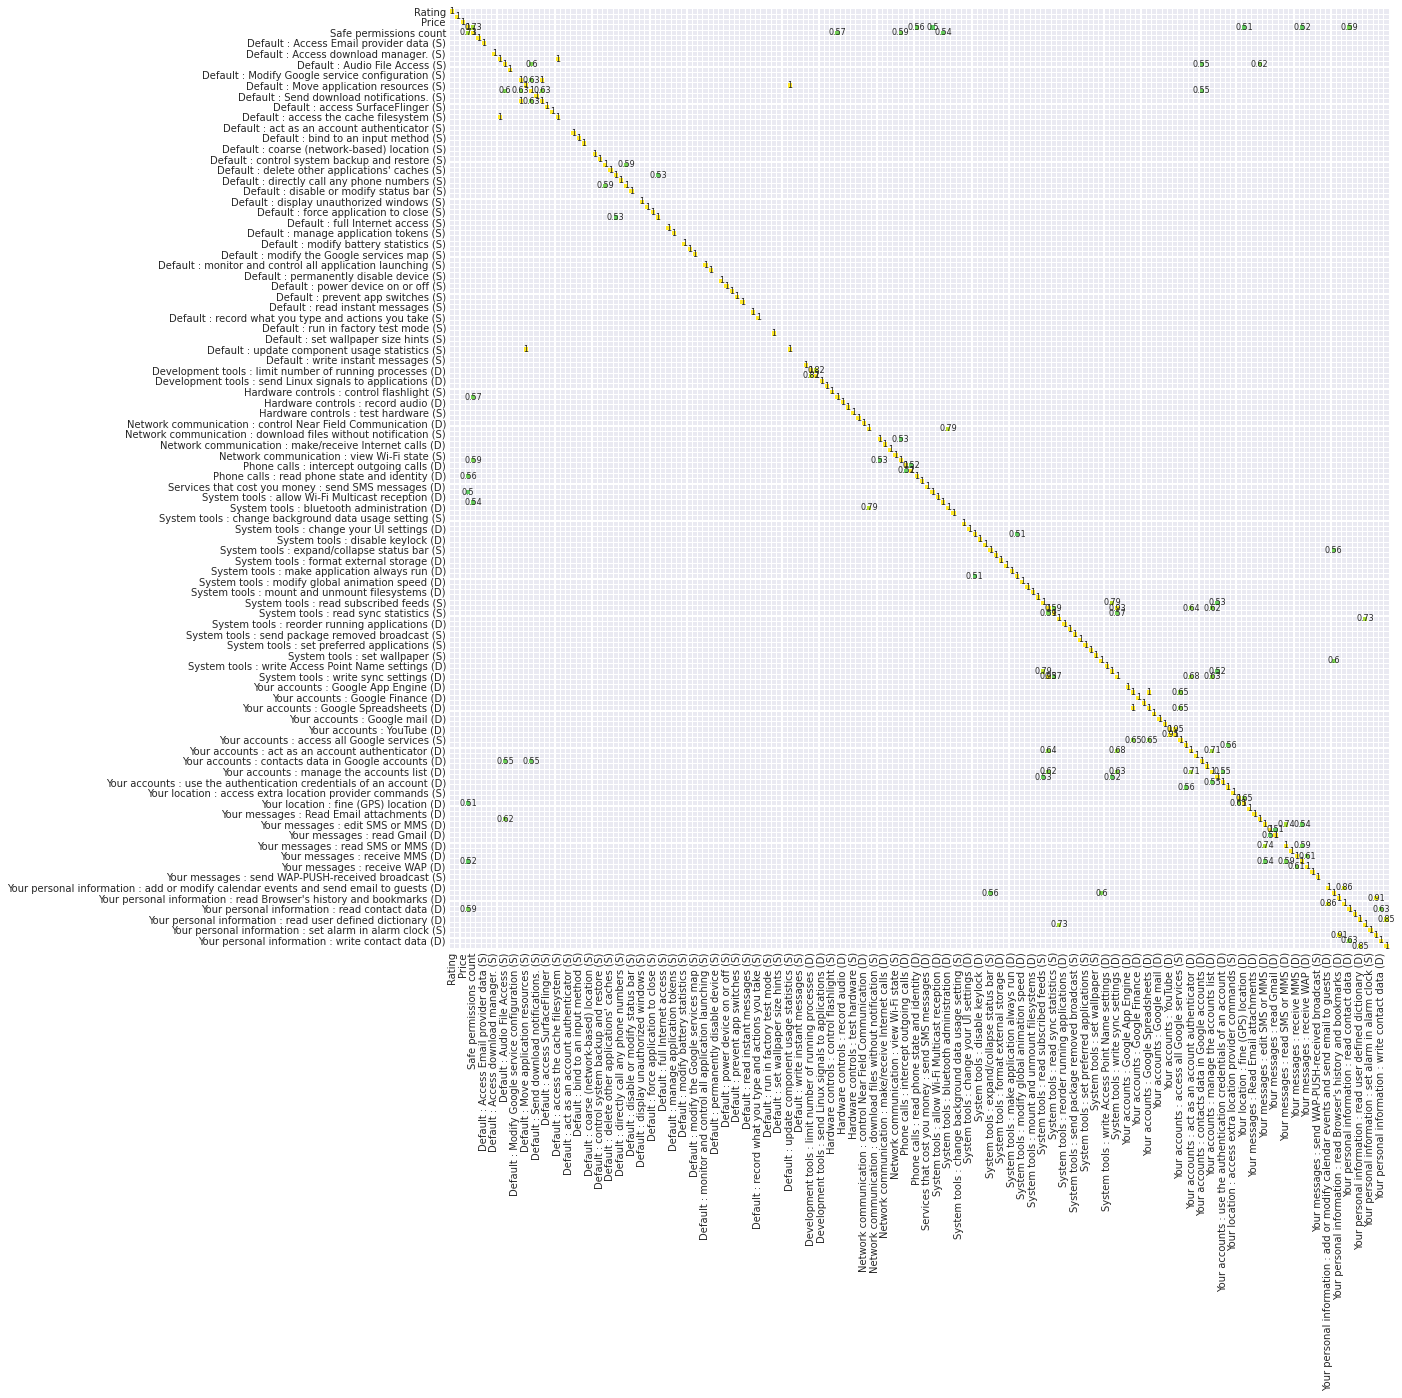

In [ ]:
plt.figure(figsize=(15,30))
corr = df_num.drop('Class', axis=1).corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], cmap='viridis', cbar=False, vmax=1, vmin=-1, linewidths=0.1, annot=True, annot_kws={'size': 8}, square=True);

#### **3.2.2) The correlation between this continuos features and the target**

In [ ]:
Android.corr()['Class'].sort_values(ascending=False).head(50)

Class                                                                                     1.000000e+00
Price                                                                                     1.372880e-01
Your location : fine (GPS) location (D)                                                   7.175690e-02
Your location : mock location sources for testing (D)                                     6.573689e-02
Services that cost you money : directly call phone numbers (D)                            5.436754e-02
Your location : access extra location provider commands (S)                               4.627258e-02
System tools : send sticky broadcast (S)                                                  3.071947e-02
Hardware controls : take pictures and videos (D)                                          2.973361e-02
Your personal information : read calendar events (D)                                      2.803290e-02
Your personal information : add or modify calendar events and send email 

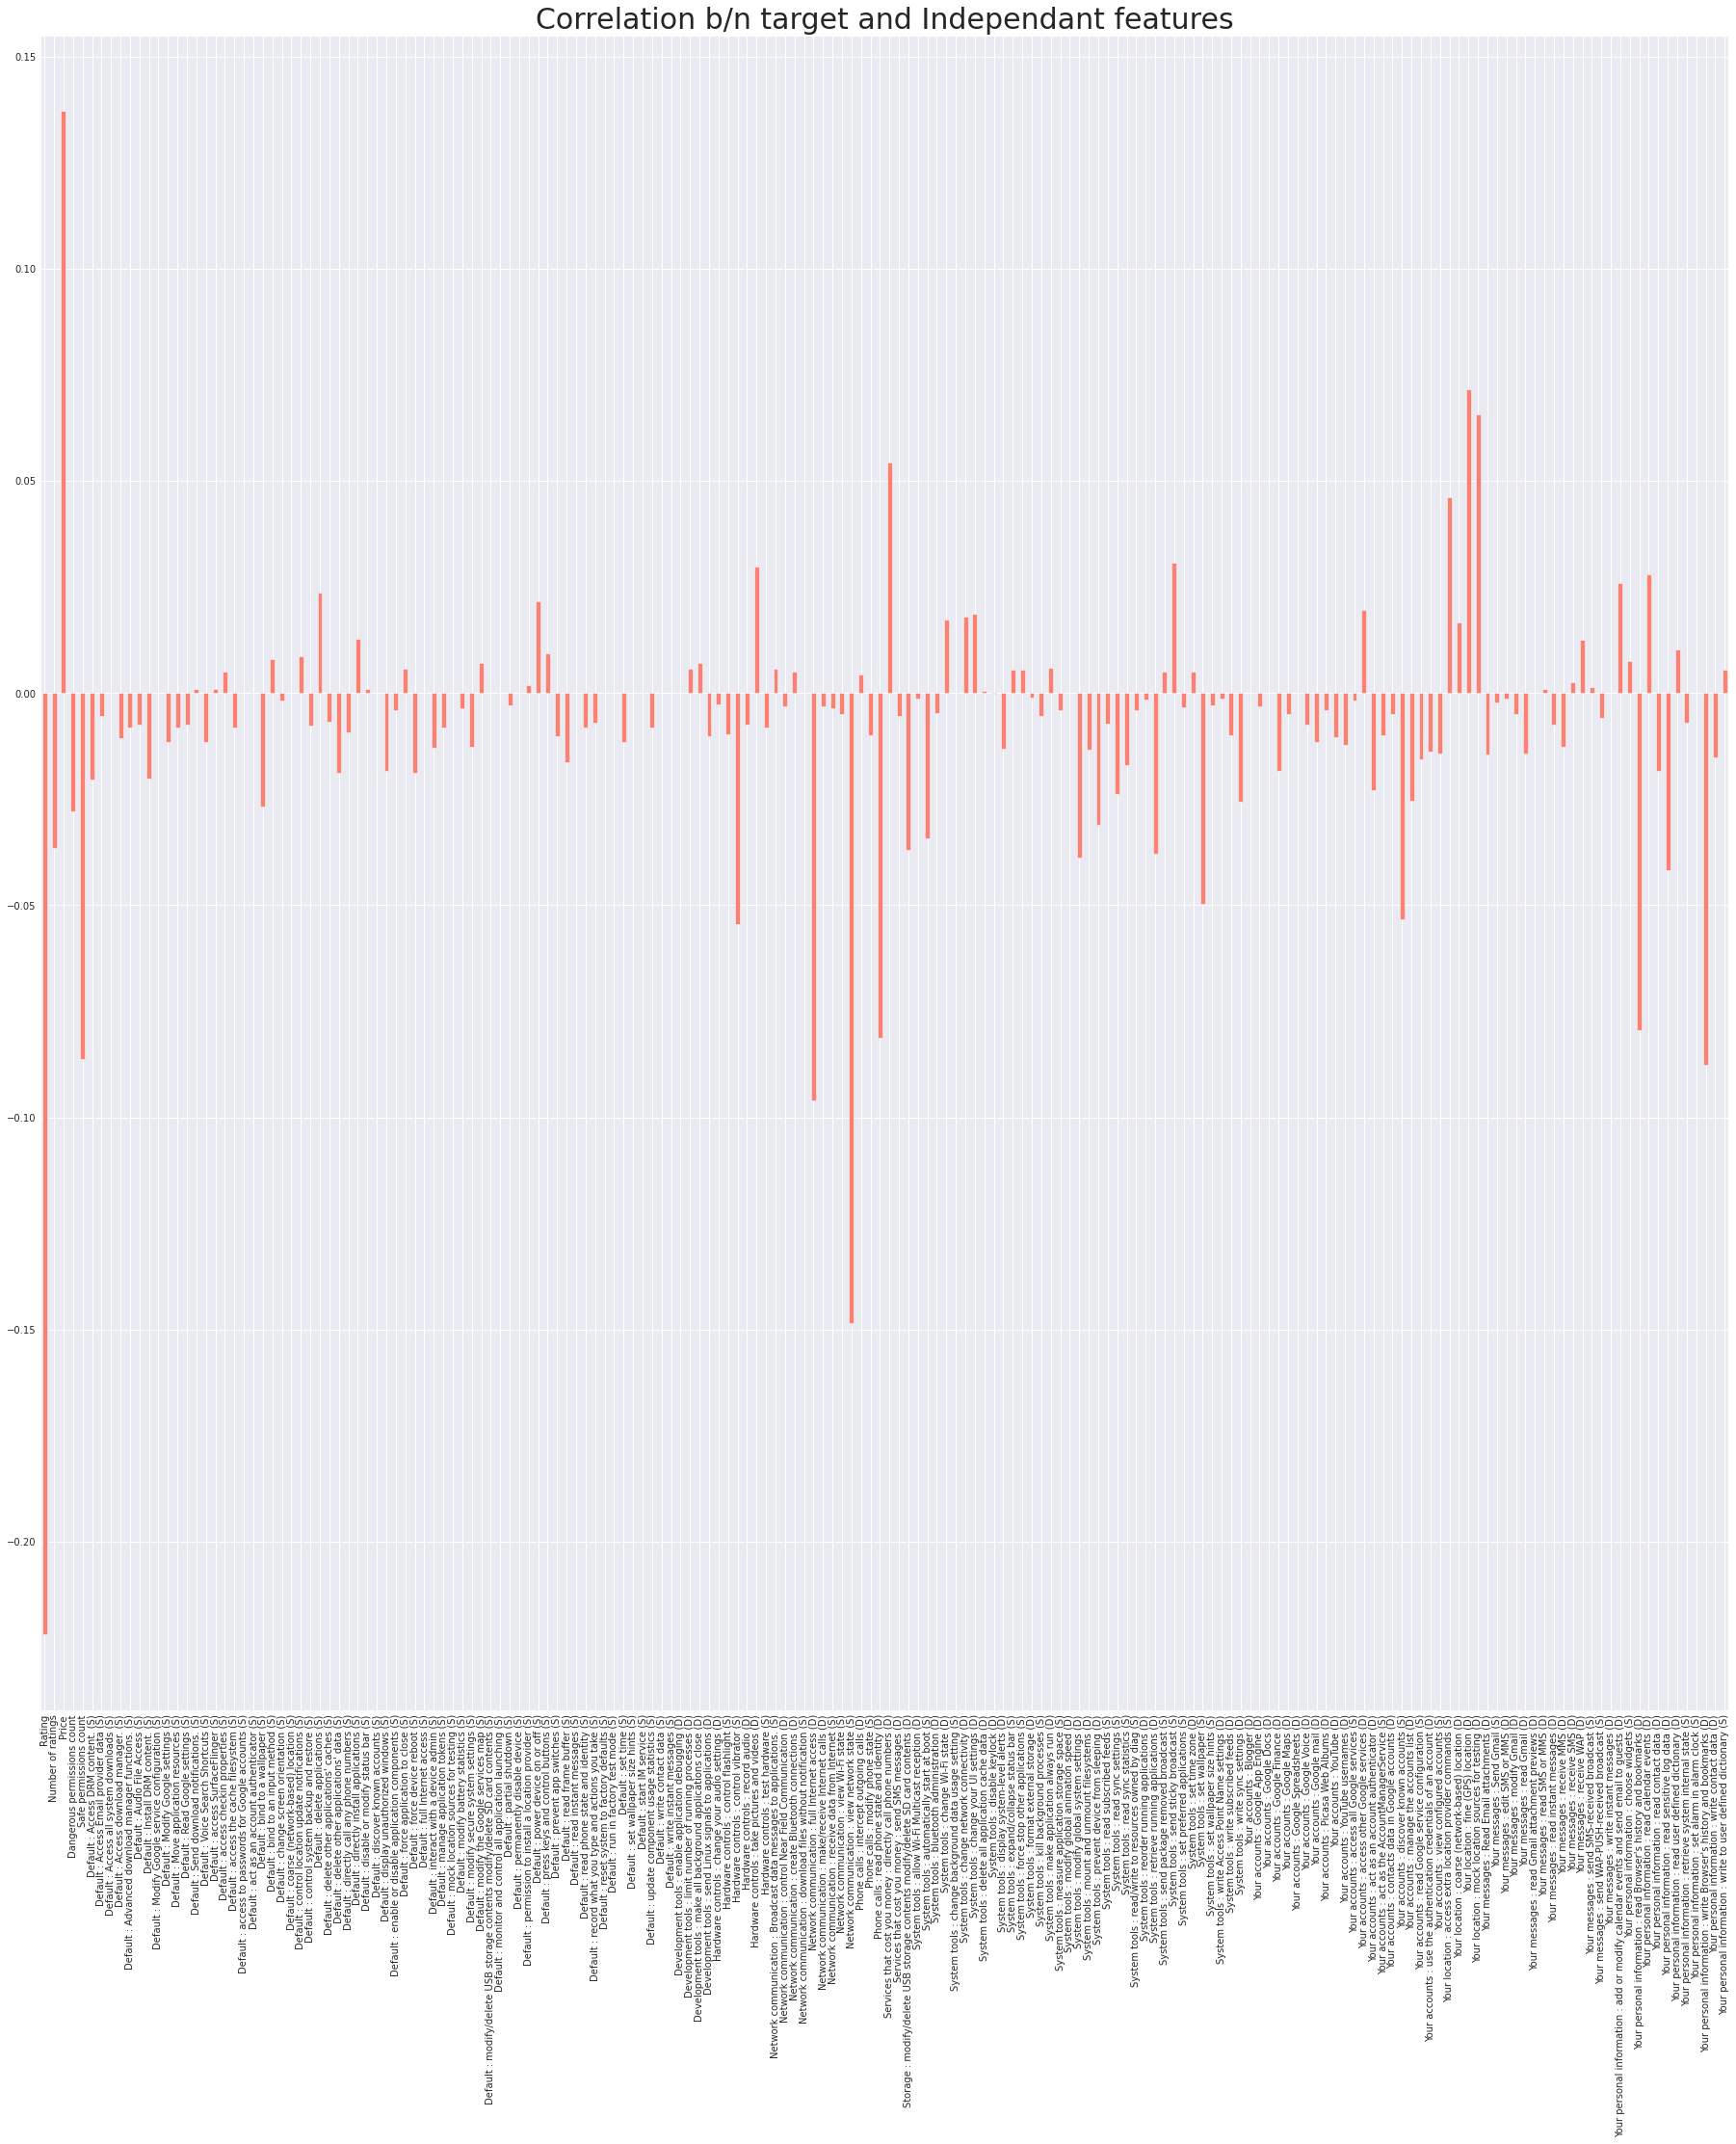

In [ ]:
a = Android.drop(['Class'], axis=1)
a.corrwith(Android['Class']).plot(kind='bar', figsize=(28,32), color=['salmon'])
plt.title('Correlation b/n target and Independant features', size=25)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

#### **3.3) Skewness and Kurtosis**

In [ ]:
Android.skew().sort_values(ascending=False).head(50)

Default : update component usage statistics (S)                         173.202194
Default : manage application tokens (S)                                 173.202194
Default : Move application resources (S)                                173.202194
Default : access the cache filesystem (S)                               173.202194
Default : Advanced download manager functions. (S)                      173.202194
Default : read phone state and identity (S)                             173.202194
Default : partial shutdown (S)                                          122.466321
Development tools : limit number of running processes (D)               122.466321
Default : Voice Search Shortcuts (S)                                    122.466321
Network communication : Broadcast data messages to applications. (S)    122.466321
Default : force application to close (S)                                122.466321
Default : set time (S)                                                  122.466321
Defa

#### **4) Feature Engineering**

##### **4.1) Missing Values**

In [7]:
# Listing Number of missing values by feature column wise
total = Android.isnull().sum().sort_values(ascending=False)
total = total[total > 0]
total

Related apps                   755
Dangerous permissions count    204
Description                      3
App                              1
dtype: int64

In [8]:
Android.isnull().sum().sum()

963

In [9]:
percentage = round(total/len(Android)*100, 2)[round(total/len(Android)*100, 2) != 0]
pd.concat([total, percentage], axis=1, keys=['Total','Percentage'])

Total  Percentage
Related apps                   755        2.52
Dangerous permissions count    204        0.68
Description                      3        0.01
App                              1         NaN

In [10]:
Android['Related apps'] = Android['Related apps'].fillna(Android['Related apps'].mode()[0])

Android['Dangerous permissions count'] = Android['Dangerous permissions count'].fillna(Android['Dangerous permissions count'].median())

Android['Description'] = Android['Description'].fillna(Android['Description'].mode()[0])

Android['App'] = Android['App'].fillna(Android['App'].mode()[0])

In [11]:
Android.isnull().sum().sum()

0

#### **4.2) Outliers**

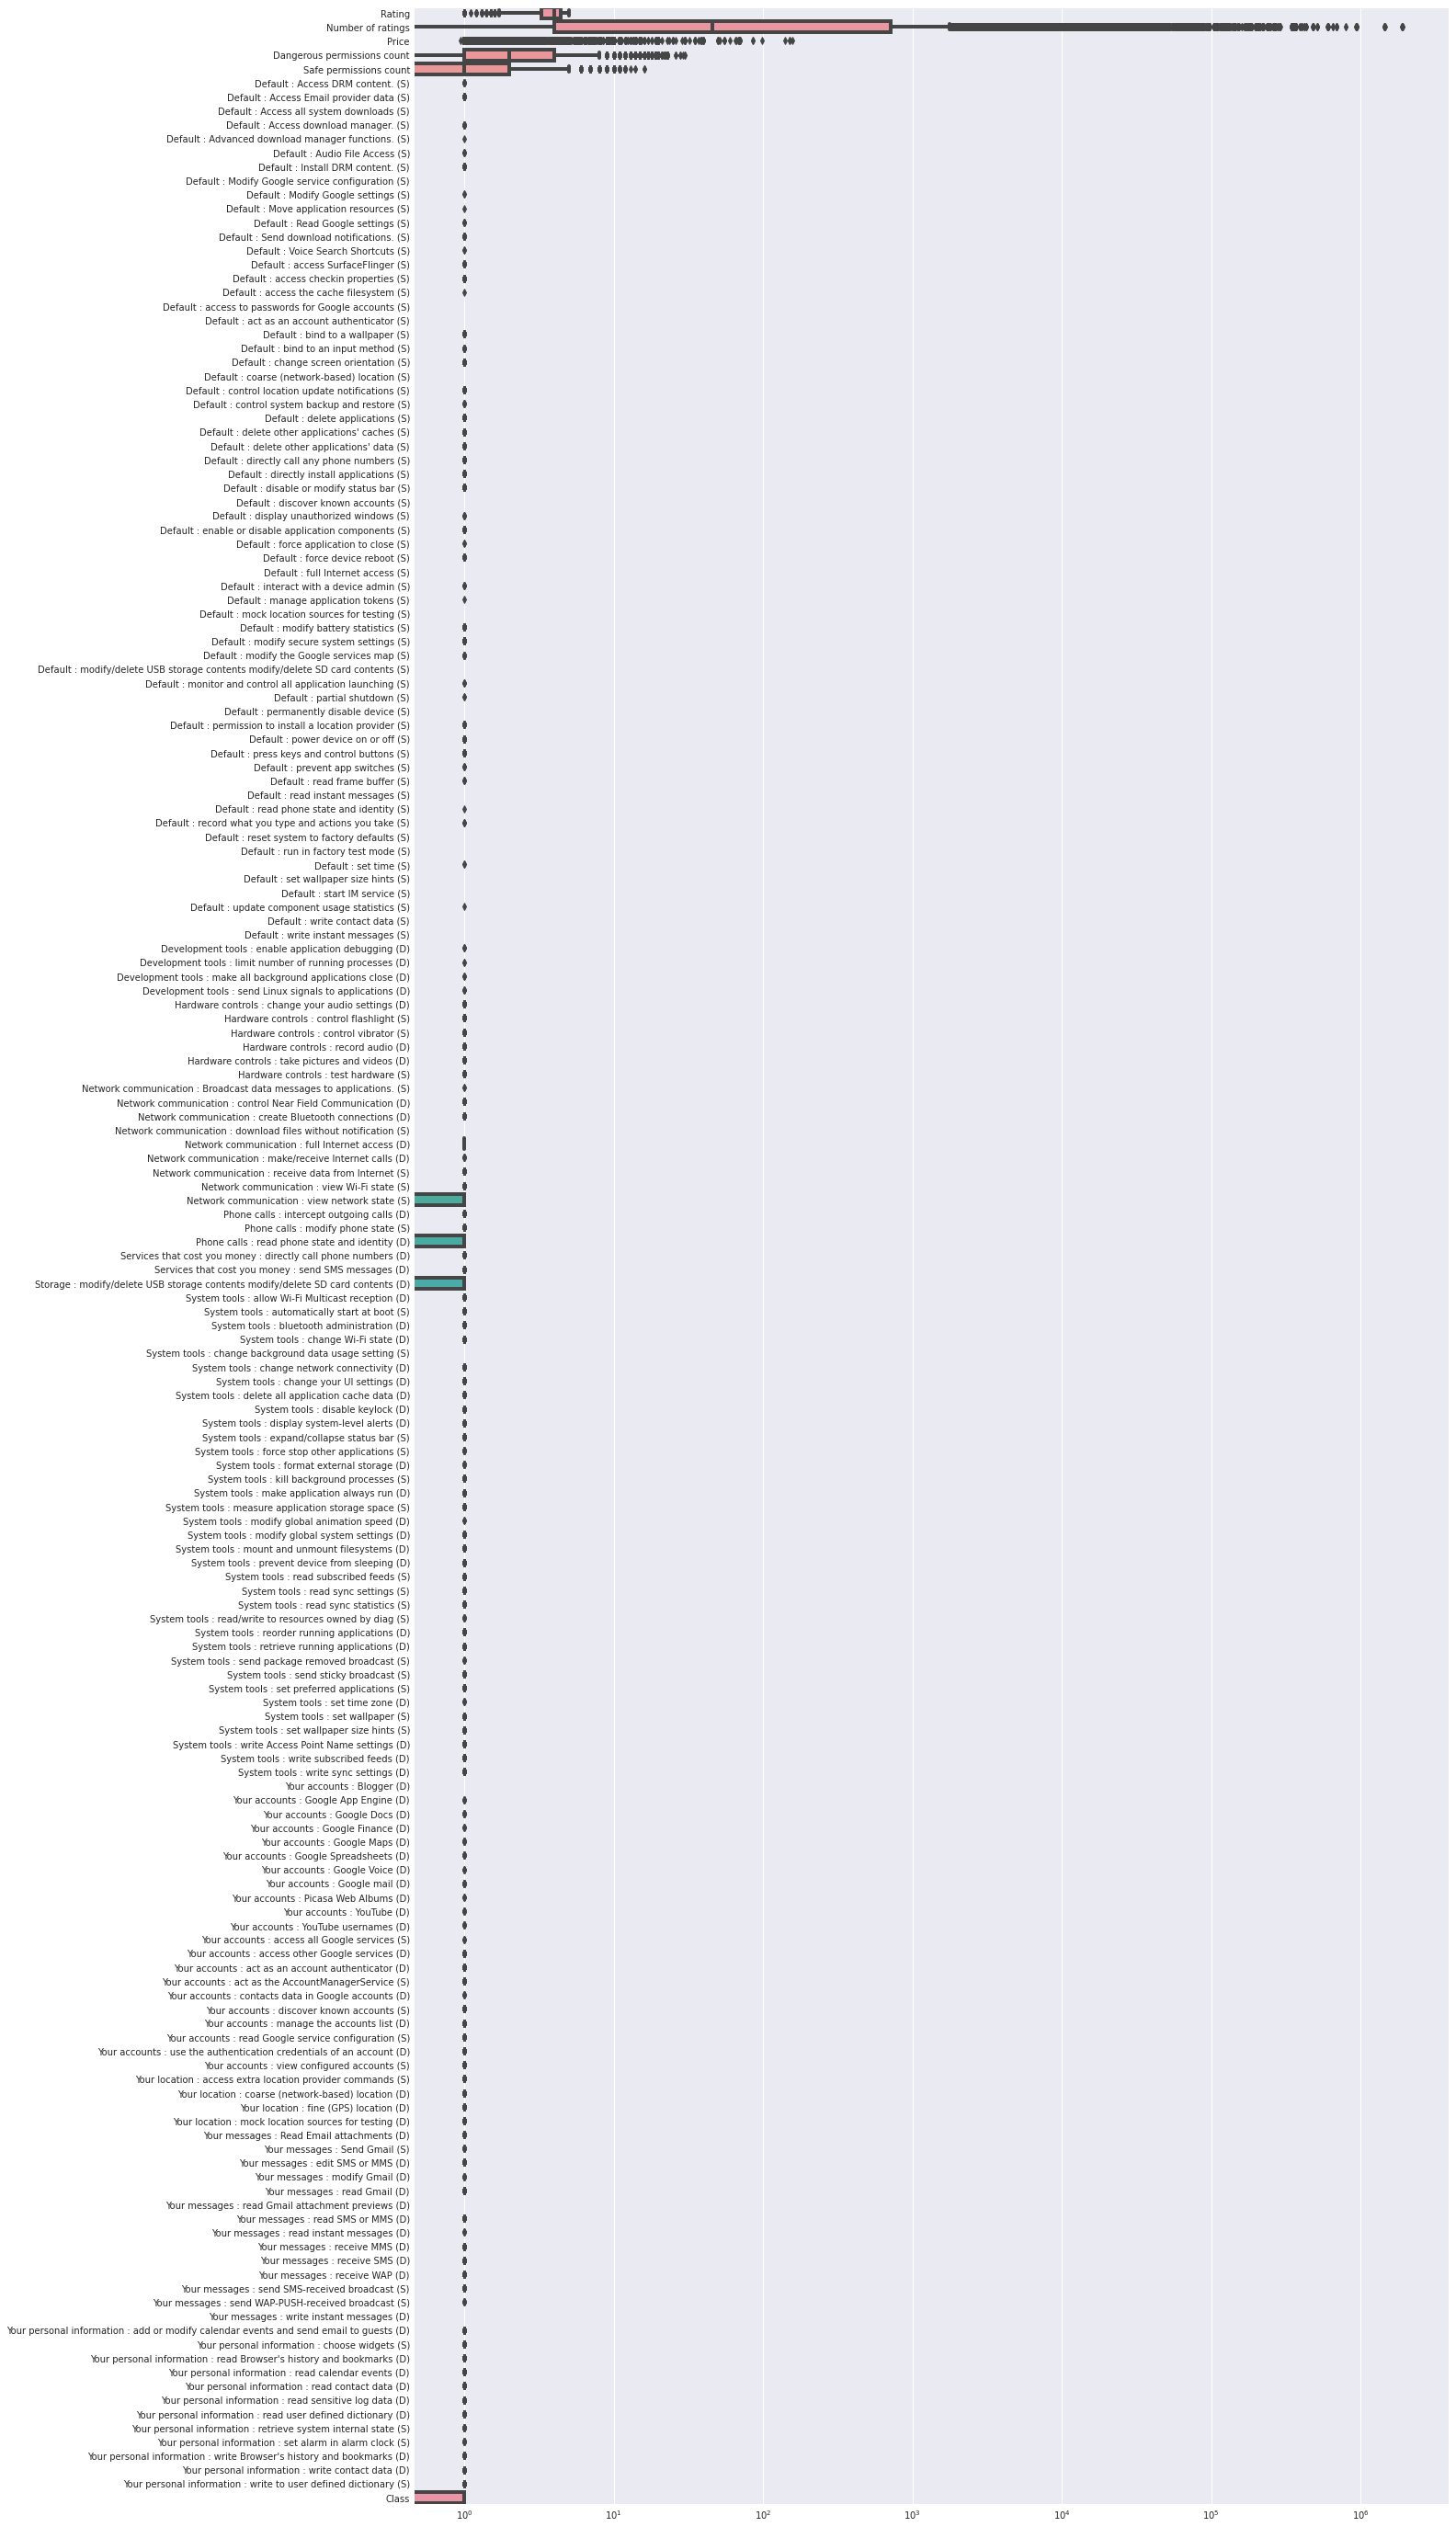

In [ ]:
plt.figure(figsize=(18,50))
sns.boxplot(data=Android, orient="h");
plt.xscale('log')

#### **4.3) Data Preprocessing**

##### **a) App**

In [32]:
Android['App'].nunique()

22823

In [41]:
Android['App'].value_counts()

Tic Tac Toe                   48
????????????                  25
Slot Machine                  16
??????????????????            15
Solitaire                     14
                              ..
Wrist Tweets                   1
Tennessee Radar                1
US Army Rifle Marksmanship     1
Asti Media Player              1
LTDMessage                     1
Name: App, Length: 22823, dtype: int64

##### **b) Package**

In [33]:
Android['Package'].nunique()

23485

##### **c) Category**

In [34]:
Android['Category'].nunique()

30

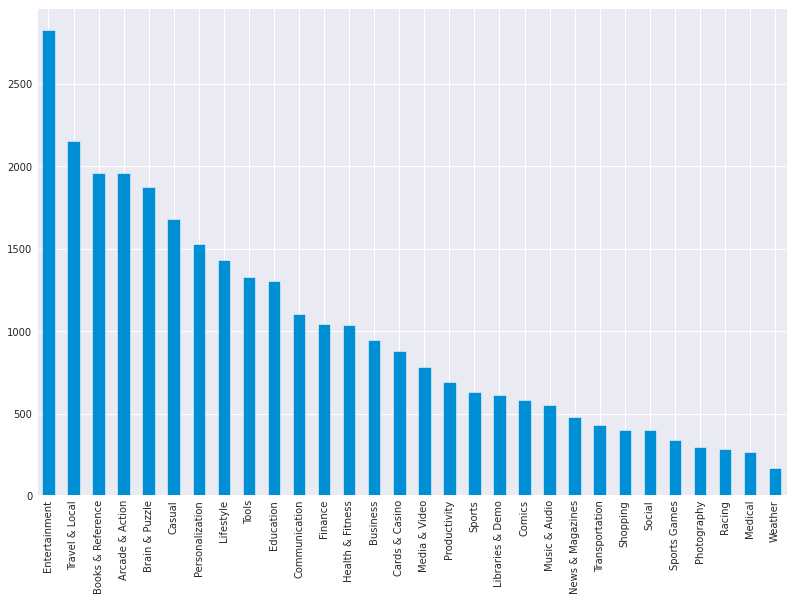

In [44]:
plt.figure(figsize=(12,9))
Android['Category'].value_counts().plot(kind='bar')
plt.show()

##### **d) Description**

In [35]:
Android['Description'].nunique()

23552

##### **e) Related apps**

In [36]:
Android['Related apps'].nunique()

23868

#### **4.3) Label Encoding**

In [45]:
#features = ['App', 'Package', 'Category', 'Description', 'Related apps']
features = ['Category']
X1 = pd.get_dummies(Android[features])
X1.head(3)

In [47]:
df = pd.concat([Android, X1], axis=1)
df.head(3)

App  ... Category_Weather
0  Canada Post Corporation  ...                0
1                Word Farm  ...                0
2     Fortunes of War FREE  ...                0

[3 rows x 214 columns]

#### **5) Feature Selection**

### **6) Modelling** 

In [ ]:
['App', 'Package', 'Category', 'Description', 'Related apps', 'Class']

In [49]:
X = df.drop(columns=List)
y = df['Class']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### **7) Model Evaluation**

##### **7.1) Random Forest**

In [51]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_pred_rfc = rfc.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rfc)

In [53]:
print("Random Forest : Train Score {:.2f} & Test Score {:.2f}".format(rfc.score(X_train, y_train), rfc.score(X_test, y_test)))
print('-'*70)
print("\n\nConfusion matrix \n\n",confusion_matrix(y_test, y_pred_rfc))
print('-'*70)
print("\n\nClassification Report\n\n",classification_report(y_test, y_pred_rfc))

Random Forest : Train Score 0.99 & Test Score 0.82
----------------------------------------------------------------------


Confusion matrix 

 [[1443  564]
 [ 513 3480]]
----------------------------------------------------------------------


Classification Report

               precision    recall  f1-score   support

           0       0.74      0.72      0.73      2007
           1       0.86      0.87      0.87      3993

    accuracy                           0.82      6000
   macro avg       0.80      0.80      0.80      6000
weighted avg       0.82      0.82      0.82      6000



No handles with labels found to put in legend.


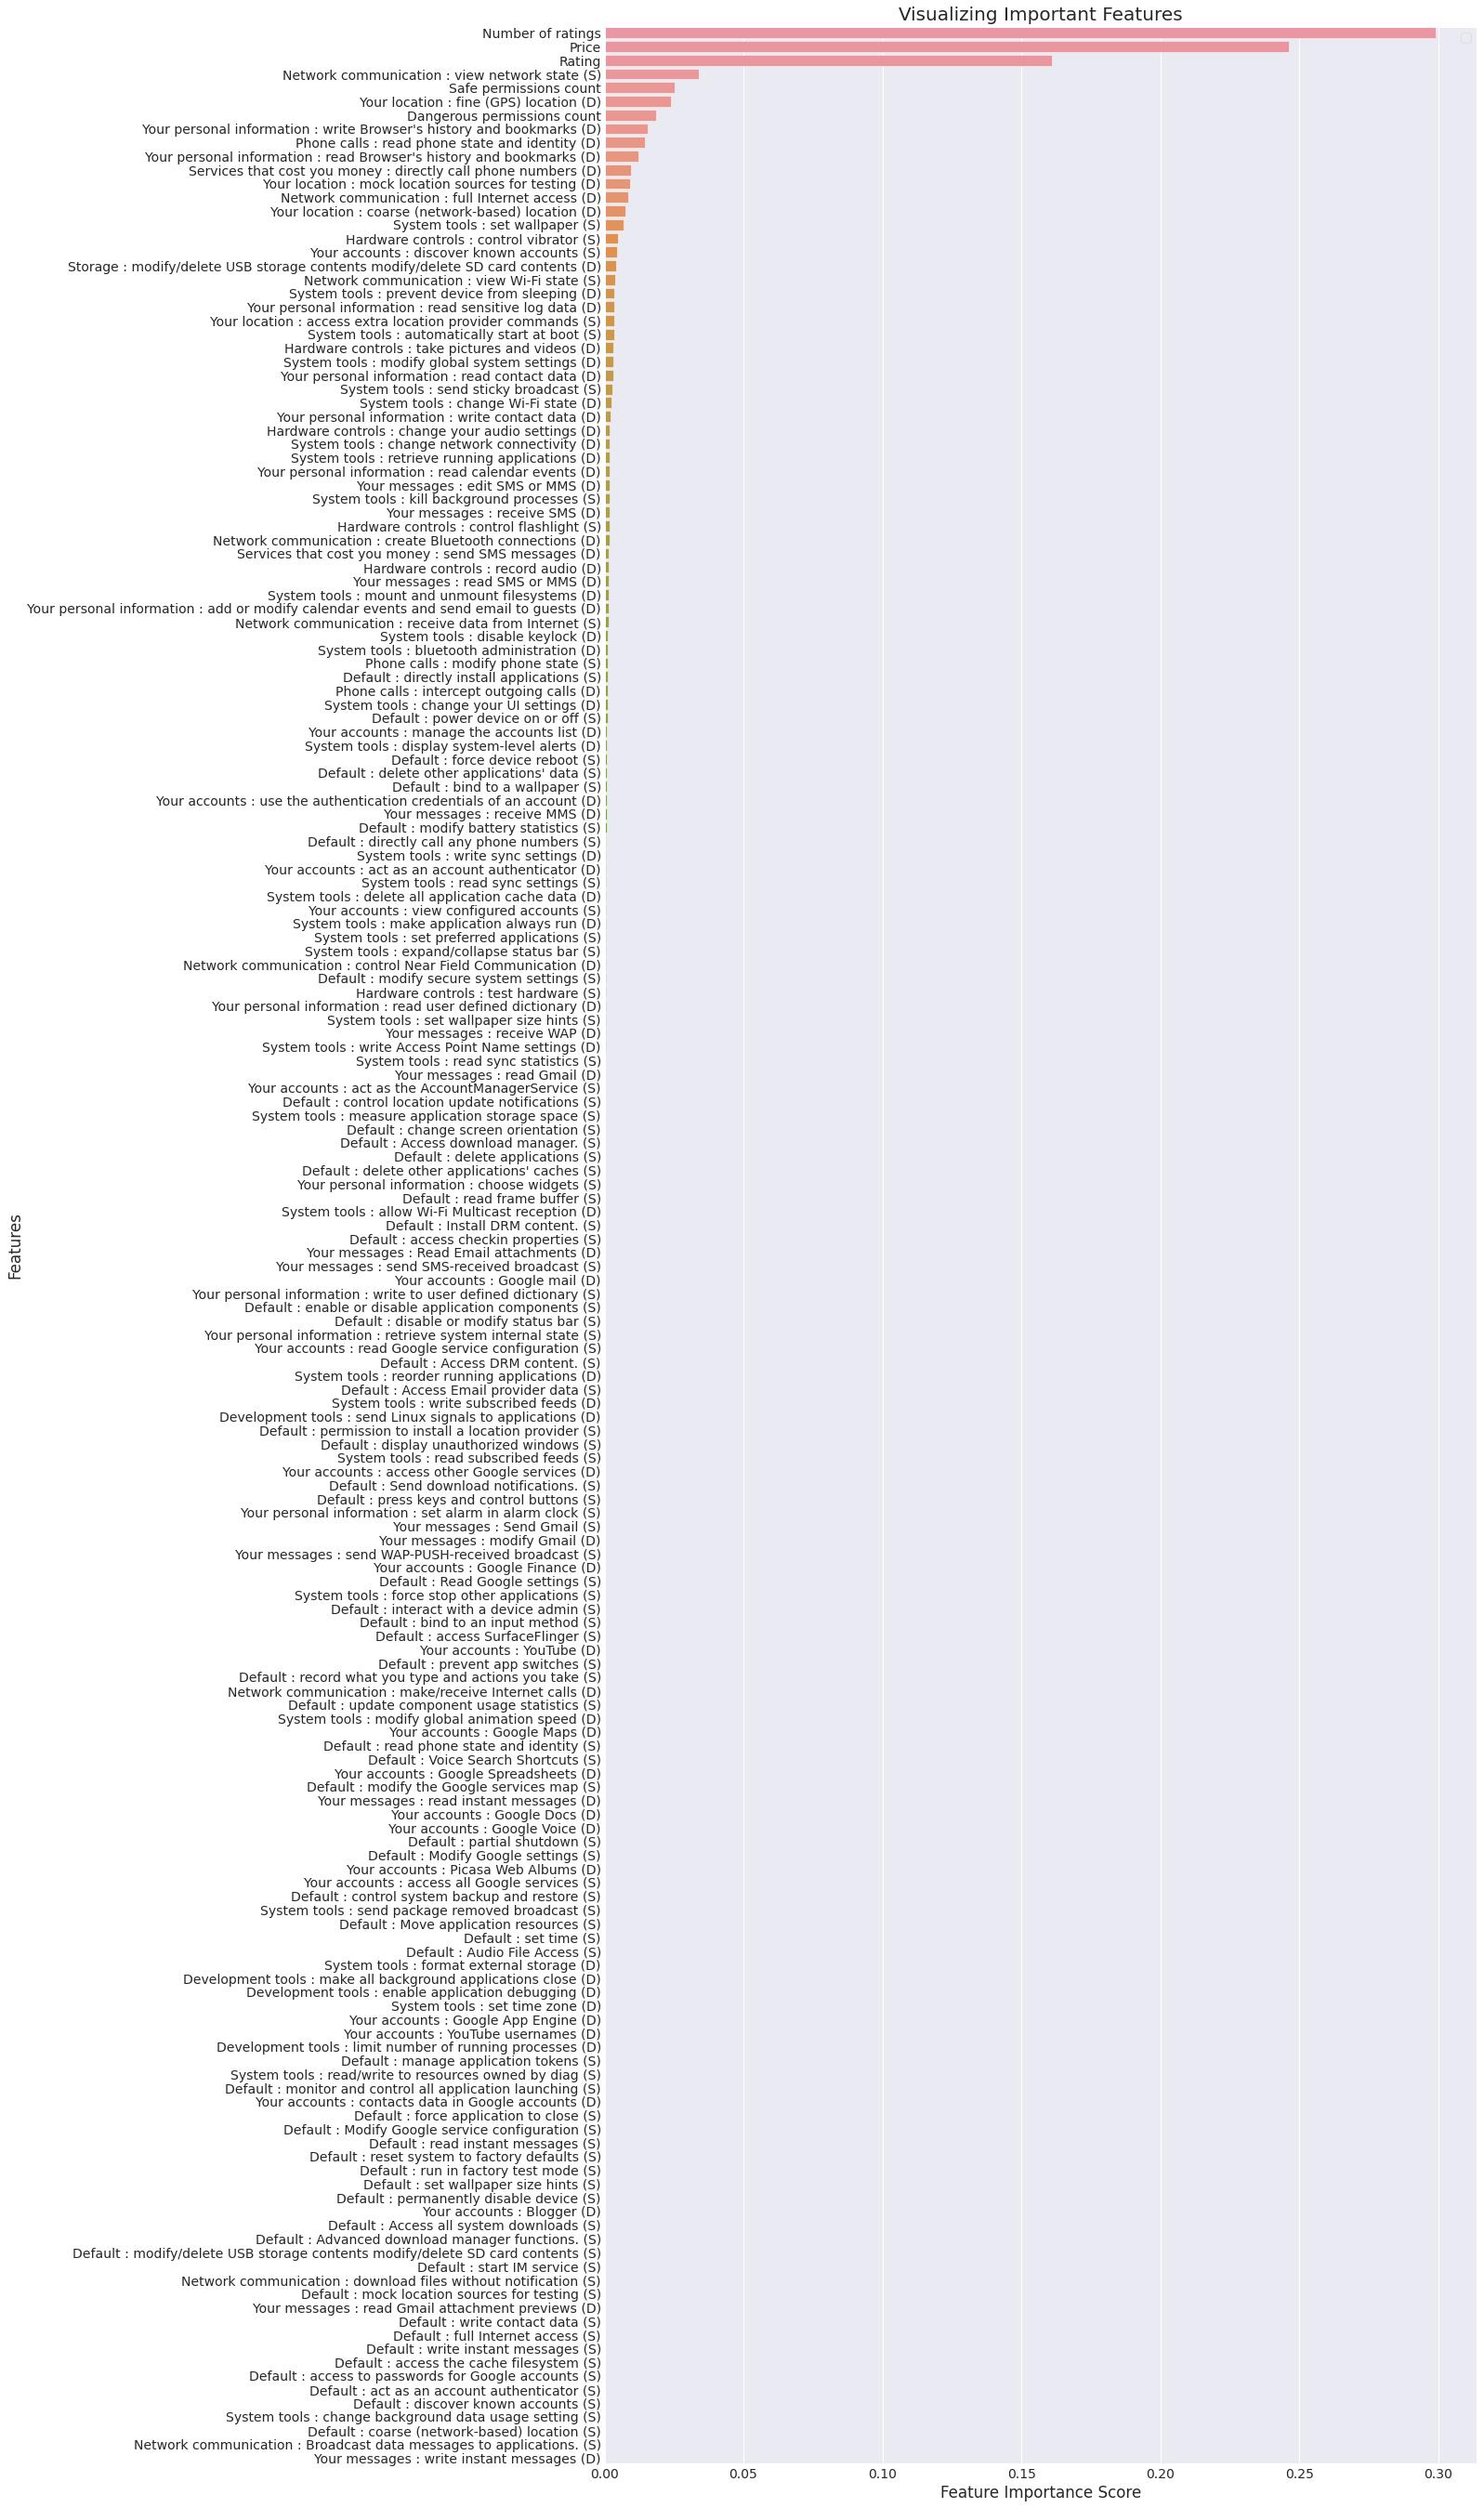

In [80]:
plt.figure(figsize=(15,45))
feature_imp = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", size=20)
plt.legend()
plt.show()

In [84]:
Android.columns.tolist()

['App',
 'Package',
 'Category',
 'Description',
 'Rating',
 'Number of ratings',
 'Price',
 'Related apps',
 'Dangerous permissions count',
 'Safe permissions count',
 'Default : Access DRM content. (S)',
 'Default : Access Email provider data (S)',
 'Default : Access all system downloads (S)',
 'Default : Access download manager. (S)',
 'Default : Advanced download manager functions. (S)',
 'Default : Audio File Access (S)',
 'Default : Install DRM content. (S)',
 'Default : Modify Google service configuration (S)',
 'Default : Modify Google settings (S)',
 'Default : Move application resources (S)',
 'Default : Read Google settings (S)',
 'Default : Send download notifications. (S)',
 'Default : Voice Search Shortcuts (S)',
 'Default : access SurfaceFlinger (S)',
 'Default : access checkin properties (S)',
 'Default : access the cache filesystem (S)',
 'Default : access to passwords for Google accounts (S)',
 'Default : act as an account authenticator (S)',
 'Default : bind to a wal

In [12]:
List = ['App', 'Package', 'Category', 'Description', 'Related apps', 'Class',
        'Your messages : write instant messages (D)', 'Network communication : Broadcast data messages to applications. (S)',
        'Default : coarse (network-based) location (S)', 'System tools : change background data usage setting (S)',
        'Default : discover known accounts (S)', 'Default : act as an account authenticator (S)',
        'Default : access to passwords for Google accounts (S)', 'Default : access the cache filesystem (S)',
        'Default : write instant messages (S)', 'Default : full Internet access (S)', 'Default : write contact data (S)',
        'Your messages : read Gmail attachment previews (D)', 'Default : mock location sources for testing (S)',
        'Network communication : download files without notification (S)', 'Default : start IM service (S)',
        'Default : modify/delete USB storage contents modify/delete SD card contents (S)', 'Default : Advanced download manager functions. (S)',
        'Default : Access all system downloads (S)', 'Your accounts : Blogger (D)', 'Default : permanently disable device (S)',
        'Default : set wallpaper size hints (S)', 'Default : run in factory test mode (S)']

#### **7.2) XGBoost**

In [54]:
xgb1 = XGBClassifier()
xgb1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [55]:
# make predictions for test set
y_pred_xgb1 = xgb1.predict(X_test)
predictions = [round(value) for value in y_pred_xgb1]

In [56]:
print("XGBoost : Train Score {:.2f} & Test Score {:.2f}".format(xgb1.score(X_train, y_train), xgb1.score(X_test, y_test)))
print('-'*70)
print("\n\nConfusion matrix \n\n", confusion_matrix(y_test, y_pred_xgb1))
print('-'*70)
print("\n\nClassification Report\n\n", classification_report(y_test, y_pred_xgb1))

XGBoost : Train Score 0.81 & Test Score 0.81
----------------------------------------------------------------------


Confusion matrix 

 [[1607  400]
 [ 747 3246]]
----------------------------------------------------------------------


Classification Report

               precision    recall  f1-score   support

           0       0.68      0.80      0.74      2007
           1       0.89      0.81      0.85      3993

    accuracy                           0.81      6000
   macro avg       0.79      0.81      0.79      6000
weighted avg       0.82      0.81      0.81      6000



#### **7.4) LGBM**

In [57]:
LGB = LGBMClassifier()
LGB.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [58]:
y_pred_LGB = LGB.predict(X_test)

In [59]:
print("XGBoost : Train Score {:.2f} & Test Score {:.2f}".format(LGB.score(X_train, y_train), LGB.score(X_test, y_test)))
print('-'*70)
print("\n\nConfusion matrix \n\n",confusion_matrix(y_test, y_pred_LGB))
print('-'*70)
print("\n\nClassification Report\n\n",classification_report(y_test, y_pred_LGB))

XGBoost : Train Score 0.84 & Test Score 0.82
----------------------------------------------------------------------


Confusion matrix 

 [[1618  389]
 [ 663 3330]]
----------------------------------------------------------------------


Classification Report

               precision    recall  f1-score   support

           0       0.71      0.81      0.75      2007
           1       0.90      0.83      0.86      3993

    accuracy                           0.82      6000
   macro avg       0.80      0.82      0.81      6000
weighted avg       0.83      0.82      0.83      6000



#### **7.5) KNN**

In [60]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
y_pred_KNN = KNN.predict(X_test)
KNN_acc = accuracy_score(y_test, y_pred_KNN)

In [62]:
print("KNeighborsClassifier : Train Score {:.2f} & Test Score {:.2f}".format(KNN.score(X_train, y_train), KNN.score(X_test, y_test)))
print('-'*70)
print("\n\nConfusion matrix \n\n",confusion_matrix(y_test, y_pred_KNN))
print('-'*70)
print("\n\nClassification Report\n\n",classification_report(y_test, y_pred_KNN))

KNeighborsClassifier : Train Score 0.82 & Test Score 0.72
----------------------------------------------------------------------


Confusion matrix 

 [[1156  851]
 [ 810 3183]]
----------------------------------------------------------------------


Classification Report

               precision    recall  f1-score   support

           0       0.59      0.58      0.58      2007
           1       0.79      0.80      0.79      3993

    accuracy                           0.72      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.72      0.72      0.72      6000



#### **8) Hyperparameter Tuning**

#### **9) Prediction**

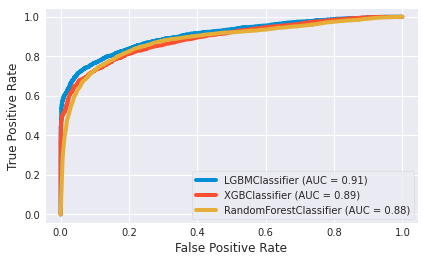

In [63]:
# AUC-ROC Curve
#plt.figure(figsize=(7,5))
from sklearn.metrics import plot_roc_curve
m1_roc = plot_roc_curve(LGB, X_test, y_test)
plot_roc_curve(xgb1, X_test, y_test, ax = m1_roc.ax_)
plot_roc_curve(rfc, X_test, y_test, ax = m1_roc.ax_)
#plot_roc_curve(DTC, X_test, y_test, ax = m1_roc.ax_)
#plot_roc_curve(log_reg3, X_test, y_test, ax = m1_roc.ax_)
#plot_roc_curve(lgbm, X_test, y_test, ax = m1_roc.ax_)
#plt.title("ROC curve comparison")
plt.show()

#### **10) Model Explainability (Explainable AI)**